In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()
train_images,test_images = train_images/255.0,test_images/255.0

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#definiacja modelu 7 warstwowego - sieci głębokiej

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5185 - accuracy: 0.8126 - val_loss: 0.4543 - val_accuracy: 0.8368
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3933 - accuracy: 0.8578 - val_loss: 0.3967 - val_accuracy: 0.8563
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3600 - accuracy: 0.8703 - val_loss: 0.4097 - val_accuracy: 0.8582
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3365 - accuracy: 0.8785 - val_loss: 0.3667 - val_accuracy: 0.8698
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3192 - accuracy: 0.8830 - val_loss: 0.3670 - val_accuracy: 0.8678
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3058 - accuracy: 0.8901 - val_loss: 0.3698 - val_accuracy: 0.8707
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2894 - accuracy: 0.8928 - val_loss: 0.3546 - val_ac

In [7]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"dokładność na danych testowych: {test_acc}, strata: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8838
dokładność na danych testowych: 0.8838000297546387, strata: 0.3470562696456909


In [9]:
predictions = model.predict(test_images)

first_image_index = 0
predicted_class = tf.argmax(predictions[first_image_index]).numpy()
print(f"odszukana klasa obrazu: {predicted_class}")
print(f"klasa porównawcza: {test_labels[first_image_index]}")

313/313 [==============================] - 1s 3ms/step
odszukana klasa obrazu: 9
klasa porównawcza: 9


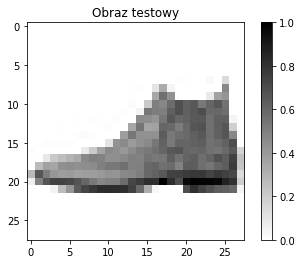

In [10]:
plt.figure()
plt.imshow(test_images[first_image_index],cmap=plt.cm.binary)
plt.title("Obraz testowy")
plt.colorbar()
plt.show()